# Step1:Reading and Understanding the data

In [1]:
#Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the Numpy and Pandas
import numpy as np
import pandas as pd

In [3]:
#Importing the data and see the head of our dataset
lead=pd.read_csv('S:/ds/Logistic Regression/Assignment/Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
#Let's check the dimensions of our dataframe
lead.shape

(9240, 37)

In [5]:
#Let's look at the sttistical aspects of our dataframe
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#Let's see the type of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
# To check the sum of missing values
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

# Step2:Data Cleaning

In [8]:
# Convert Select to nan
lead=lead.replace('Select',np.nan)

In [9]:
#Adding up the missing values(Column wise)
lead.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
#Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [11]:
#Dropping the column which has 70% greater than the nan values i.e. Lead Profile
lead=lead.drop('Lead Profile',1)


In [12]:
lead=lead.drop('How did you hear about X Education',1)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
lead['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

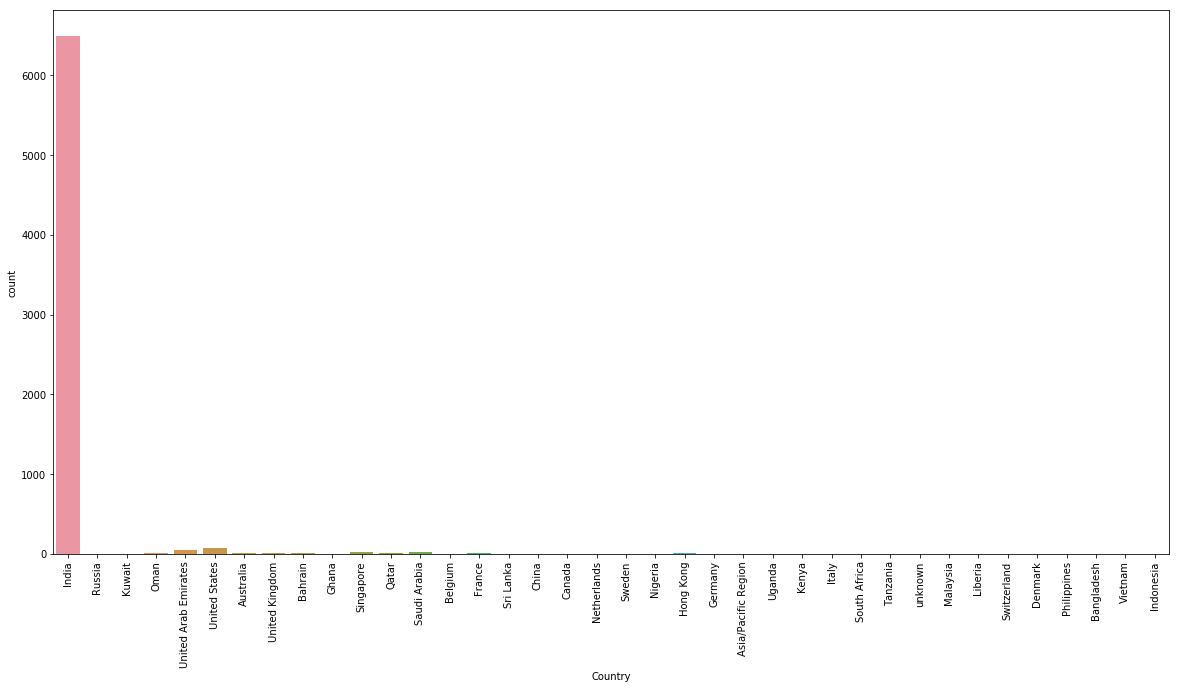

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(lead['Country'])
plt.xticks(rotation=90)

In [16]:
lead['Country']=lead['Country'].replace(np.nan,'India')

In [17]:
lead['Specialization'].describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

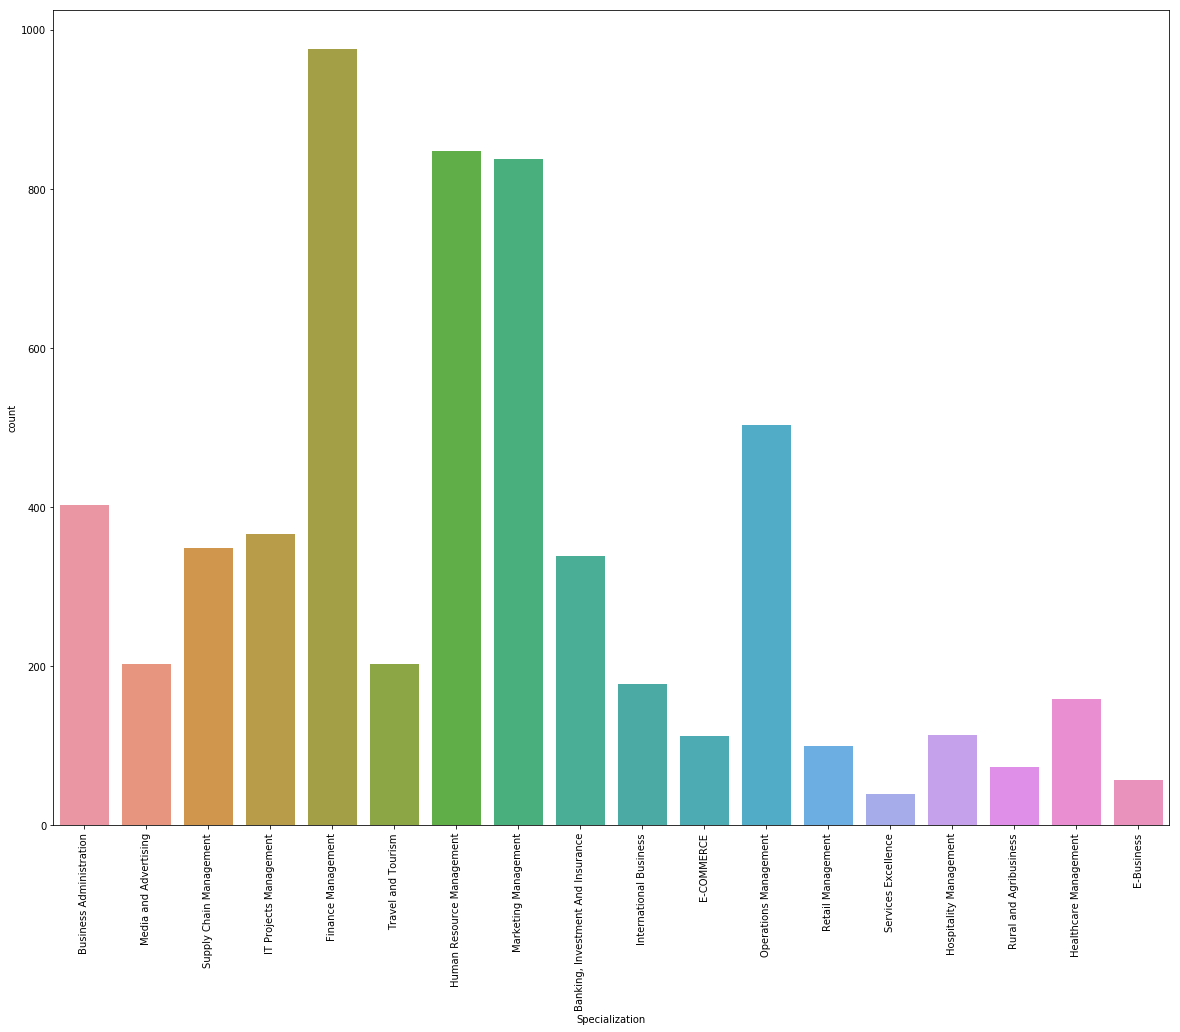

In [18]:
plt.figure(figsize=(20,15))
sns.countplot(lead['Specialization'])
plt.xticks(rotation=90)

In [19]:
lead['Specialization']=lead['Specialization'].replace(np.nan,'Others')

In [20]:
lead['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

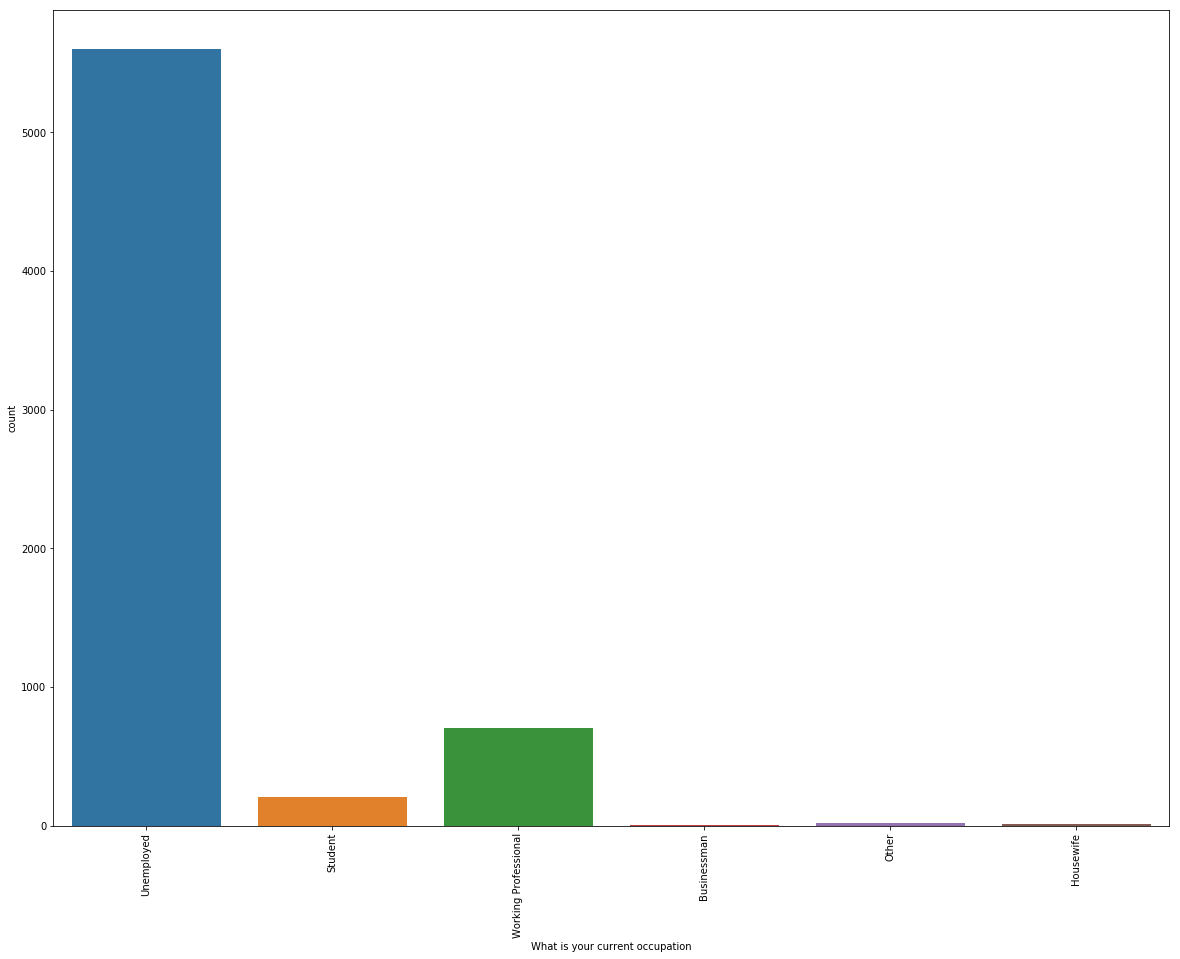

In [21]:
plt.figure(figsize=(20,15))
sns.countplot(lead['What is your current occupation'])
plt.xticks(rotation=90)

In [22]:
lead['What is your current occupation']=lead['What is your current occupation'].replace(np.nan,'Unemployed')

In [23]:
lead['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

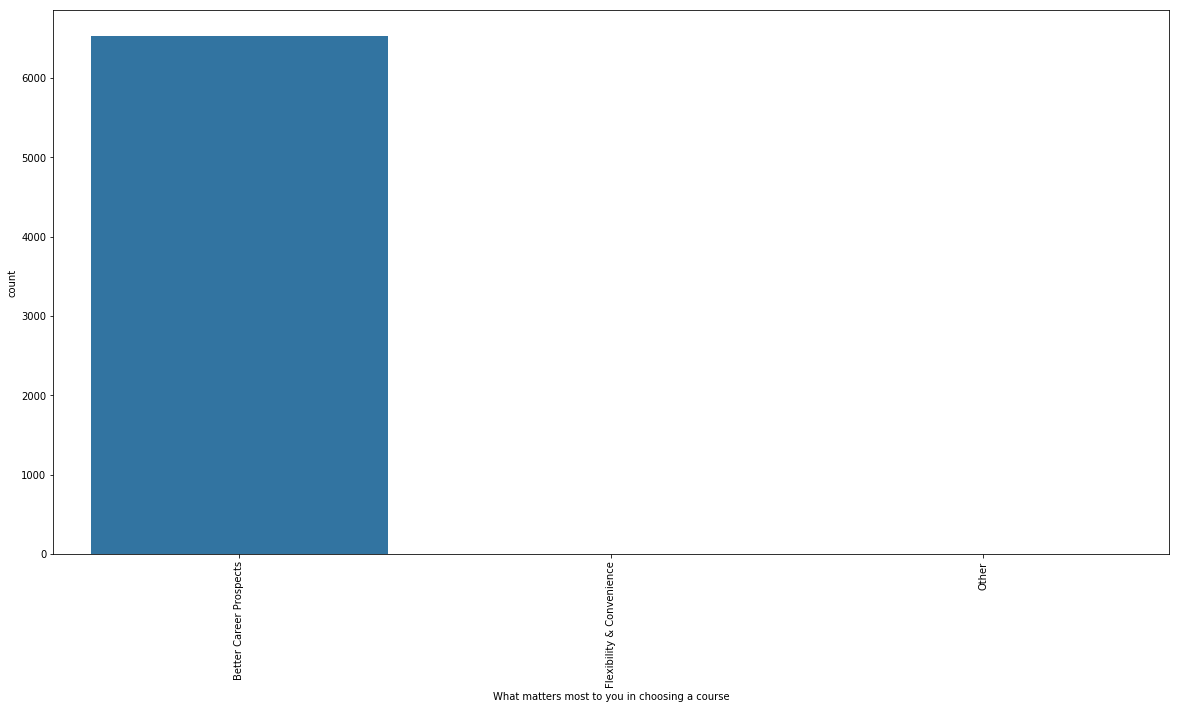

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(lead['What matters most to you in choosing a course'])
plt.xticks(rotation=90)

In [25]:
lead['What matters most to you in choosing a course']=lead['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [26]:
lead['Tags'].describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

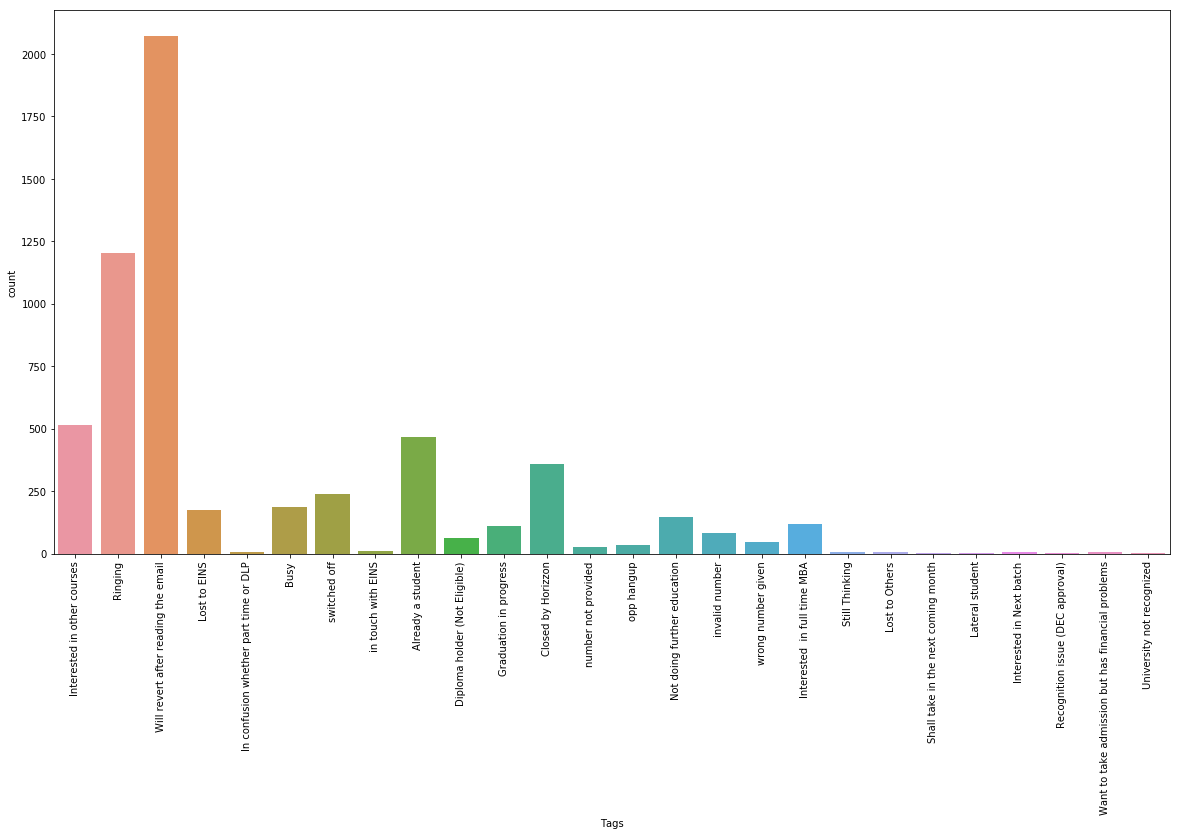

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(lead['Tags'])
plt.xticks(rotation=90)

In [28]:
lead['Tags']=lead['Tags'].replace(np.nan,'Will revert after reading the email')

In [29]:
lead['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

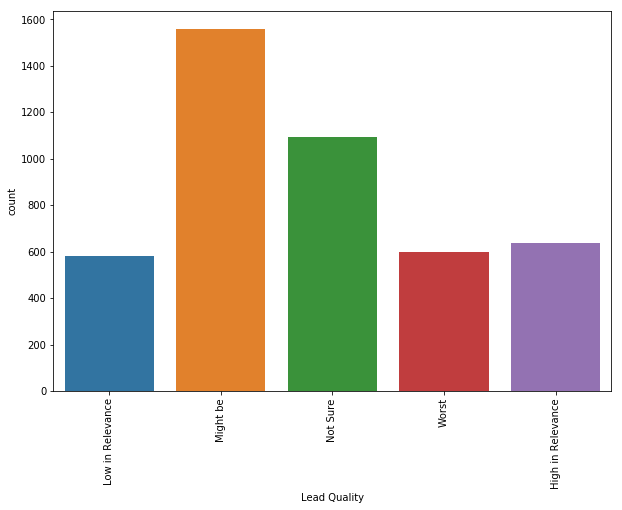

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(lead['Lead Quality'])
plt.xticks(rotation=90)

In [31]:
lead['Lead Quality']=lead['Lead Quality'].replace(np.nan,'Not Sure')

In [32]:
lead['City'].describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

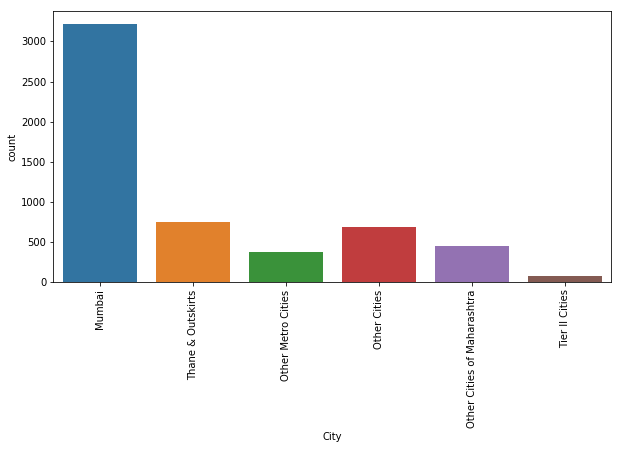

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(lead['City'])
plt.xticks(rotation=90)

In [34]:
lead['City']=lead['City'].replace(np.nan,'Mumbai')

In [35]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [36]:
lead['Asymmetrique Activity Index'].describe()

count          5022
unique            3
top       02.Medium
freq           3839
Name: Asymmetrique Activity Index, dtype: object

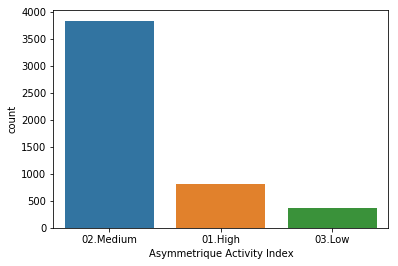

In [37]:
plt1=sns.countplot(lead['Asymmetrique Activity Index'])


In [38]:
lead['Asymmetrique Profile Index'].describe()

count          5022
unique            3
top       02.Medium
freq           2788
Name: Asymmetrique Profile Index, dtype: object

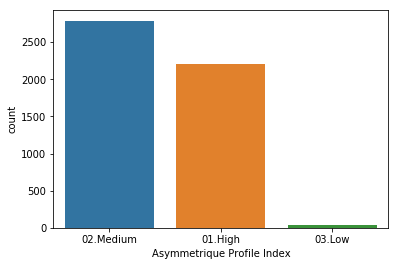

In [39]:
plt2=sns.countplot(lead['Asymmetrique Profile Index'])

In [40]:
lead['Asymmetrique Activity Score'].describe()

count    5022.000000
mean       14.306252
std         1.386694
min         7.000000
25%        14.000000
50%        14.000000
75%        15.000000
max        18.000000
Name: Asymmetrique Activity Score, dtype: float64

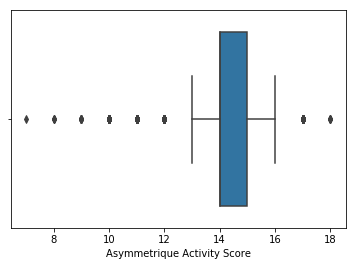

In [41]:
sns.boxplot(lead['Asymmetrique Activity Score'])

In [42]:
lead['Asymmetrique Profile Score'].describe()

count    5022.000000
mean       16.344883
std         1.811395
min        11.000000
25%        15.000000
50%        16.000000
75%        18.000000
max        20.000000
Name: Asymmetrique Profile Score, dtype: float64

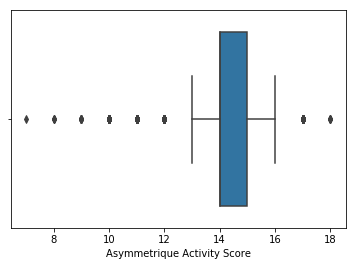

In [43]:
sns.boxplot(lead['Asymmetrique Activity Score'])

In [44]:
lead=lead.drop(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],1)

In [45]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

In [46]:
lead.dropna(inplace=True)

In [47]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [48]:
lead.shape

(9074, 31)

# Step3:Analyzing the Data

In [49]:
Converted=(sum(lead['Converted'])/len(lead['Converted'].index))*100
Converted

37.85541106458012

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

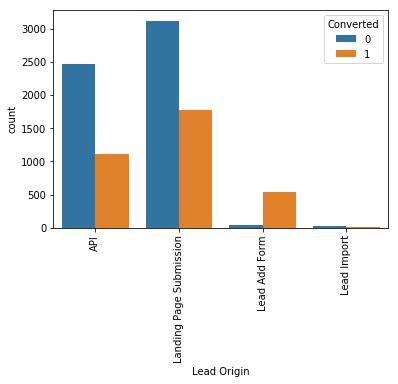

In [50]:
sns.countplot(x='Lead Origin',hue='Converted',data=lead)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

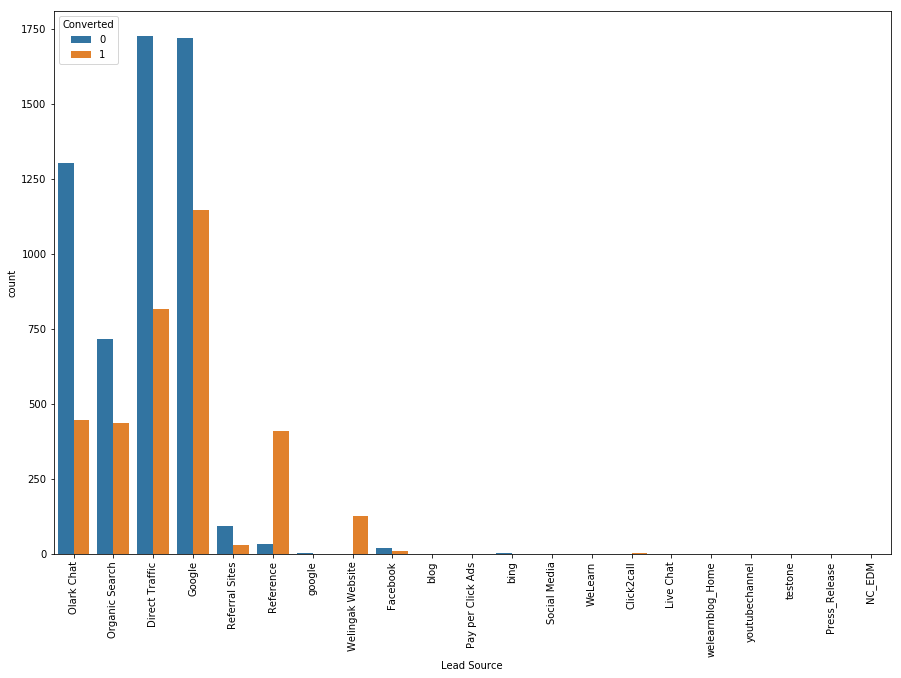

In [51]:
plt.figure(figsize=(15,10))
sns.countplot(x='Lead Source',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [52]:
lead['Lead Source']=lead['Lead Source'].replace(['google'],'Google')
lead['Lead Source']=lead['Lead Source'].replace(['blog','Pay per Click Ads','bing','Social Media','WeLearn','Click2cal','Live Chat','welearnblog_Home','youtubechannel','testone','Press_Release','NC_EDM'],'Others')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

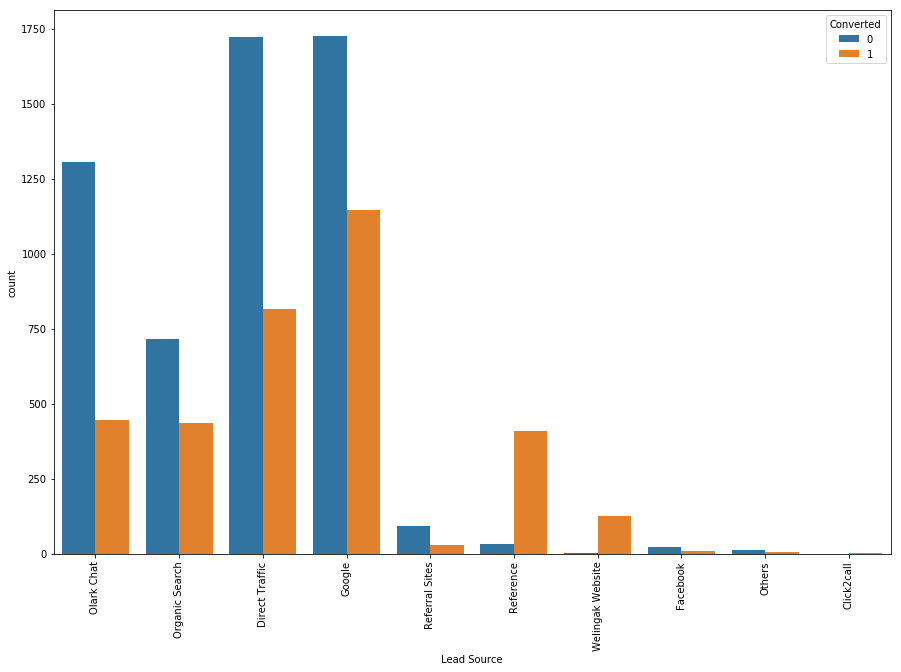

In [53]:
plt.figure(figsize=(15,10))
sns.countplot(x='Lead Source',hue='Converted',data=lead)
plt.xticks(rotation=90)

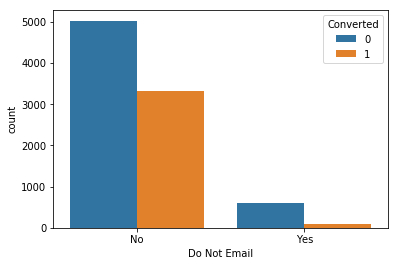

In [54]:
sns.countplot(x='Do Not Email',hue='Converted',data=lead)

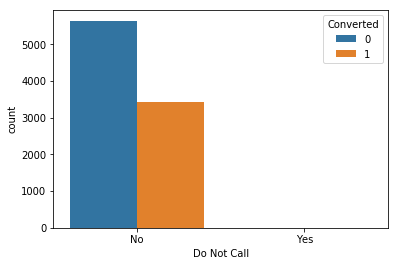

In [55]:
sns.countplot(x='Do Not Call',hue='Converted',data=lead)

In [56]:
lead['TotalVisits'].describe(percentiles=(.05,.10,.25,.50,.75,.90,.95,.99))

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
5%          0.000000
10%         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

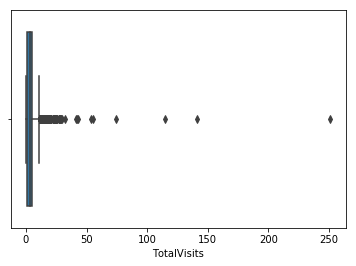

In [57]:
sns.boxplot(lead['TotalVisits'])

In [58]:
percentiles=lead['TotalVisits'].quantile([0.05,0.95]).values
lead['TotalVisits'][lead['TotalVisits']<=percentiles[0]]=percentiles[0]
lead['TotalVisits'][lead['TotalVisits']>=percentiles[1]]=percentiles[1]

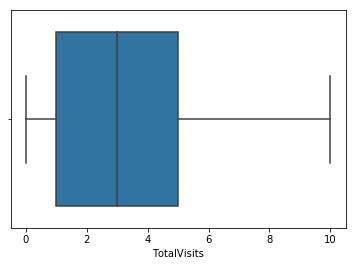

In [59]:
sns.boxplot(lead['TotalVisits'])

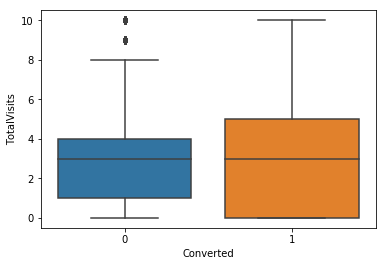

In [60]:
sns.boxplot(y='TotalVisits',x='Converted',data=lead)

In [61]:
lead['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

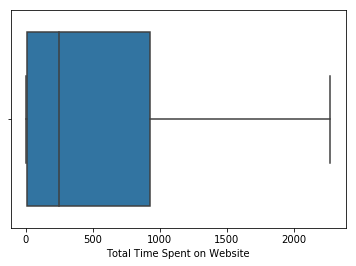

In [62]:
sns.boxplot(lead['Total Time Spent on Website'])

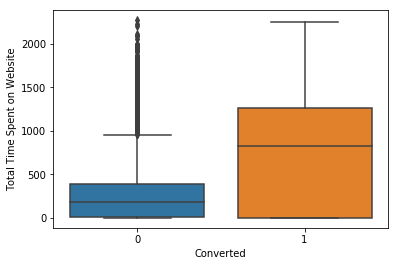

In [63]:
sns.boxplot(y='Total Time Spent on Website',x='Converted',data=lead)

In [64]:
lead['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

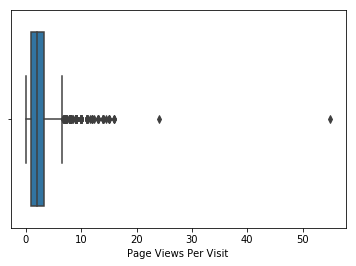

In [65]:
sns.boxplot(lead['Page Views Per Visit'])

In [66]:
percentiles=lead['Page Views Per Visit'].quantile([0.05,0.95]).values
lead['Page Views Per Visit'][lead['Page Views Per Visit']<=percentiles[0]]=percentiles[0]
lead['Page Views Per Visit'][lead['Page Views Per Visit']>=percentiles[1]]=percentiles[1]

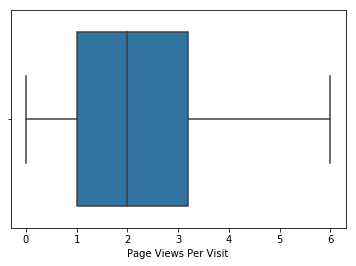

In [67]:
sns.boxplot(lead['Page Views Per Visit'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

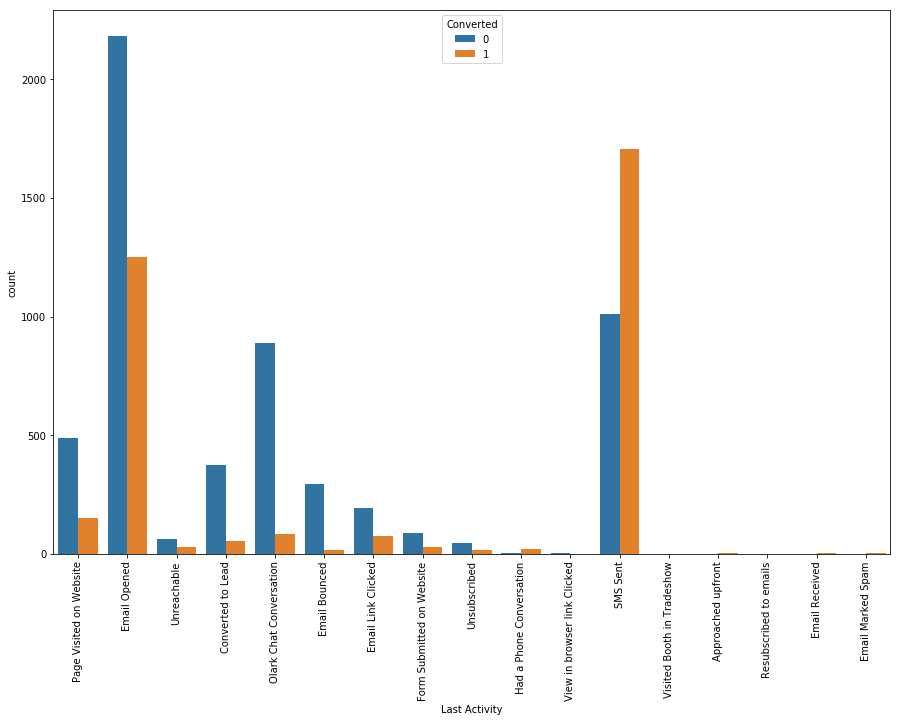

In [68]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [69]:
lead['Last Activity']=lead['Last Activity'].replace(['Had a Phone Conversation','View in browser link Clicked','Visited Booth in Tradeshow','Approached upfront','Resubscribed to emails','Email Received','Email Marked Spam'],'Other Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

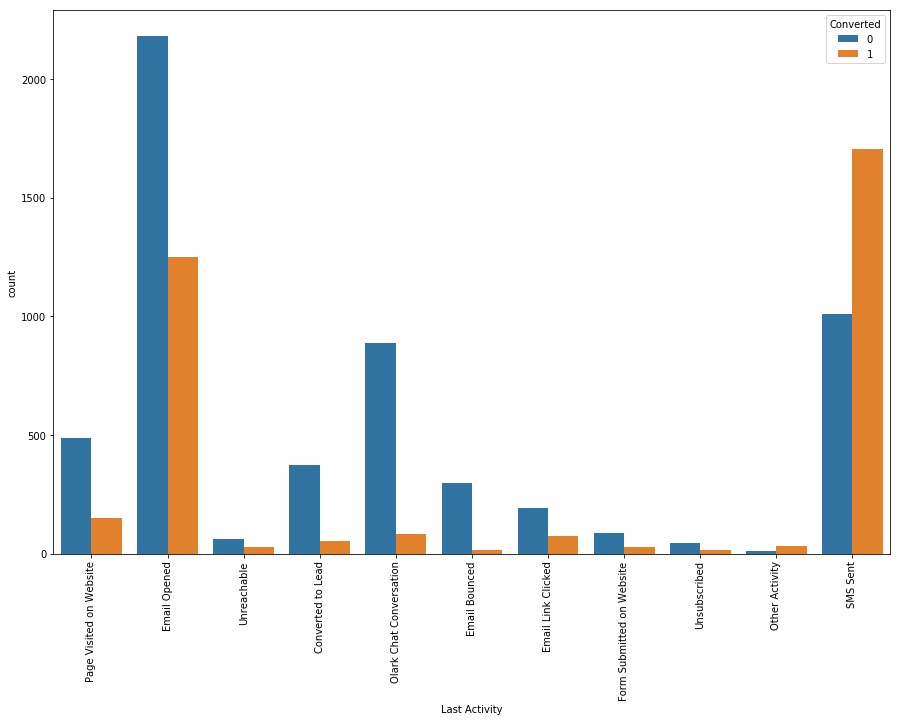

In [70]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

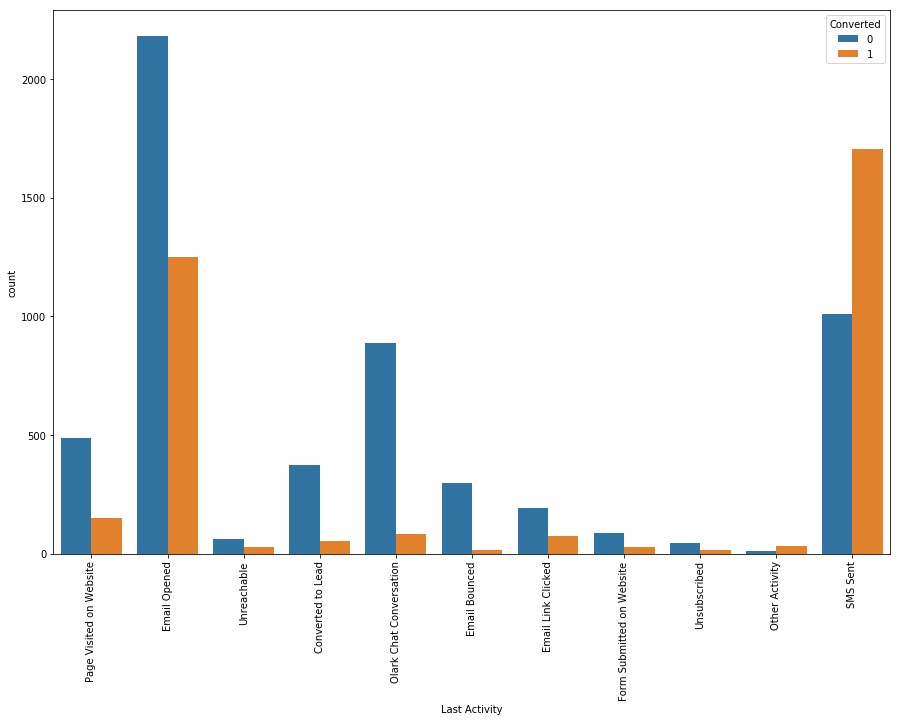

In [71]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

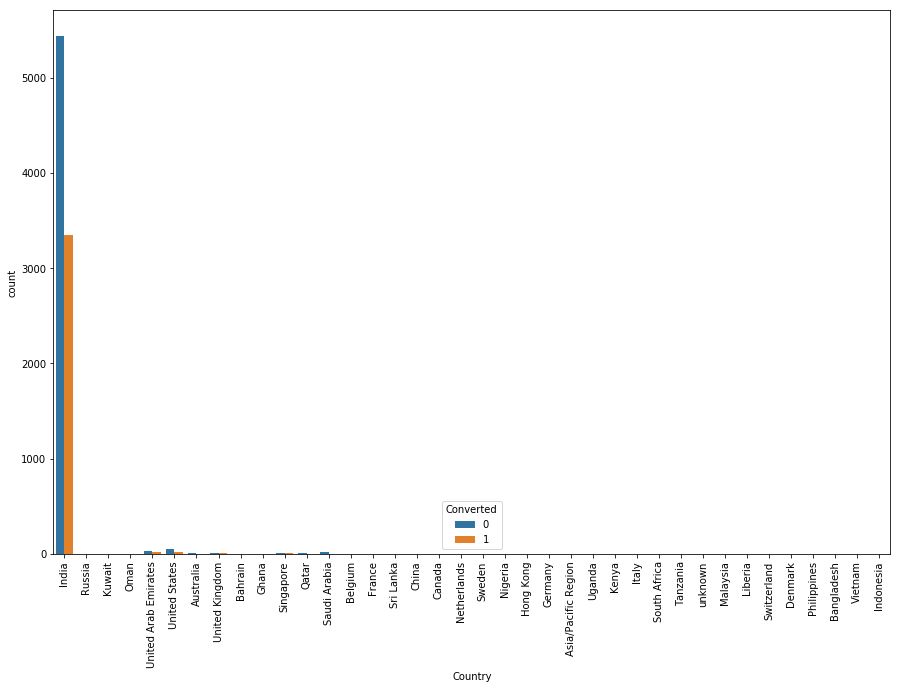

In [72]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [73]:
lead['Country']=lead['Country'].replace(['Russia','Kuwait','Oman','Bahrain','Ghana','Belgium','France','Sri Lanka','China','Canada','Netherlands','Sweden','Nigeria','Hong Kong','Germany','Asia/Pacific Region','Uganda','Kenya','Italy','South Africa','Tanzania','unknown','Malaysia','Liberia','Switzerland','Denmark','Philippines','Bangladesh','Vietnam','Indonesia'],'Other countries')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

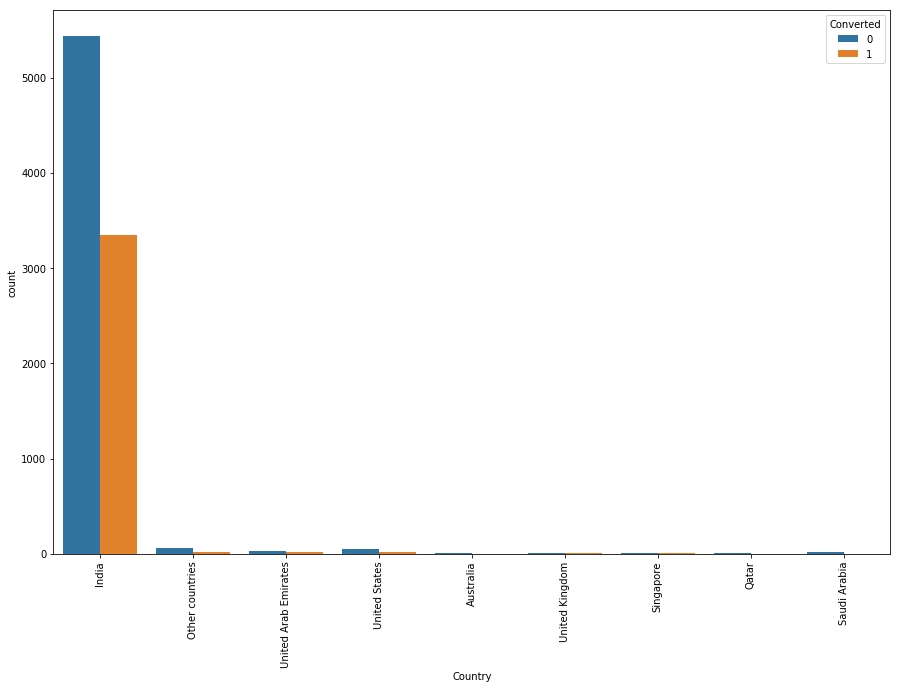

In [74]:
plt.figure(figsize=(15,10))
sns.countplot(x='Country',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [75]:
lead['Specialization'].describe()

count       9074
unique        19
top       Others
freq        3282
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

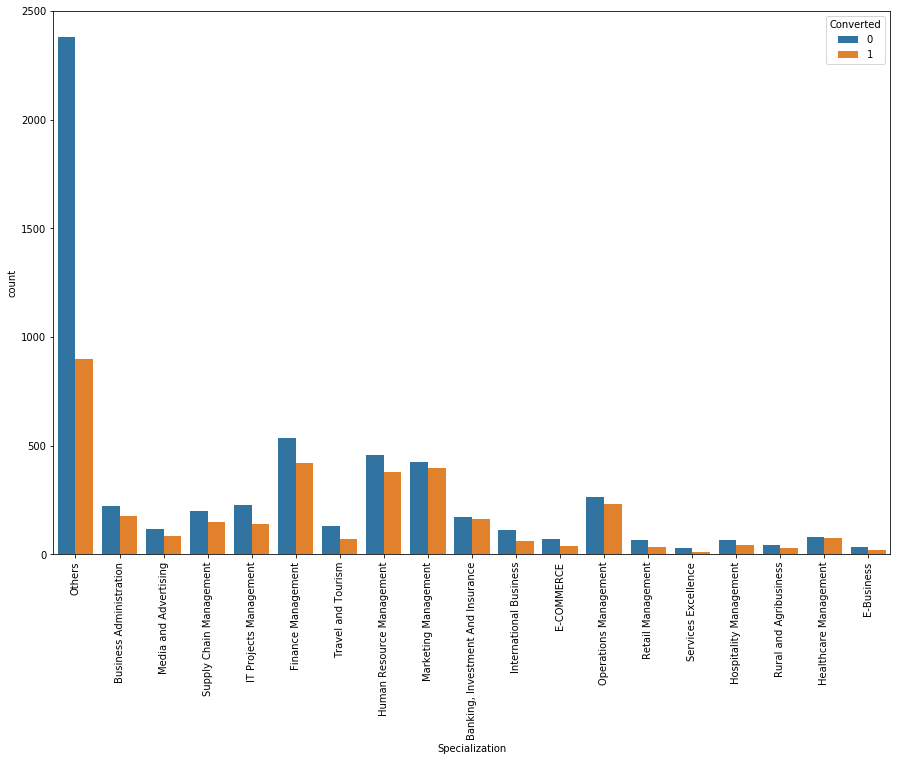

In [76]:
plt.figure(figsize=(15,10))
sns.countplot(x='Specialization',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [77]:
lead['Specialization']=lead['Specialization'].replace('Others','Other Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

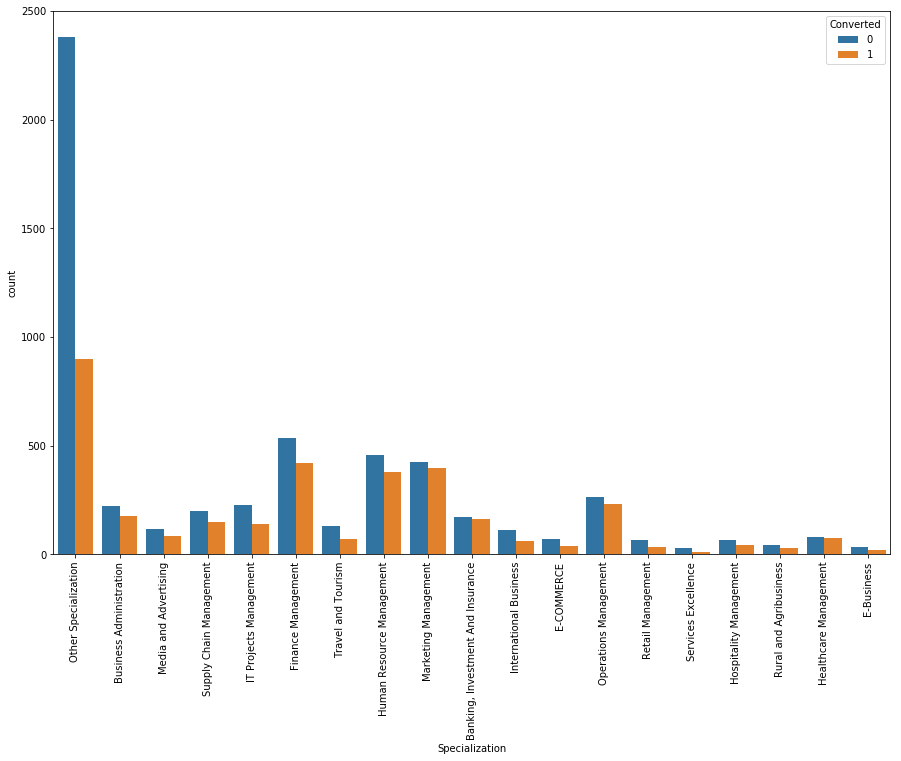

In [78]:
plt.figure(figsize=(15,10))
sns.countplot(x='Specialization',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [79]:
lead['What is your current occupation'].describe()

count           9074
unique             6
top       Unemployed
freq            8159
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

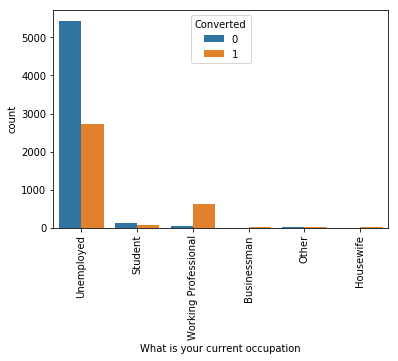

In [80]:
sns.countplot(x='What is your current occupation',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [81]:
lead['What is your current occupation']=lead['What is your current occupation'].replace('Other','Other Occupation')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

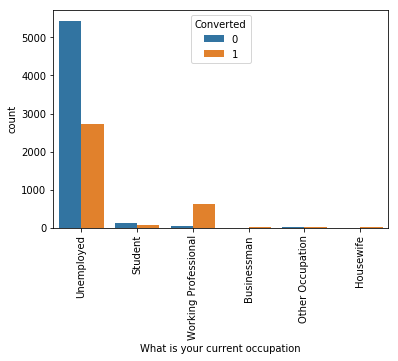

In [82]:
sns.countplot(x='What is your current occupation',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [83]:
lead['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

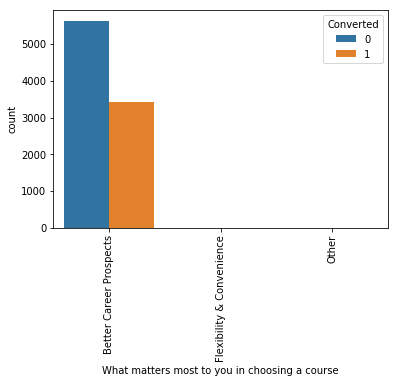

In [84]:
sns.countplot(x='What matters most to you in choosing a course',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [85]:
lead['Search'].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

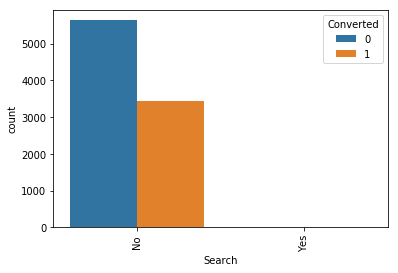

In [86]:
sns.countplot(x='Search',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [87]:
lead['Magazine'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

In [88]:
lead['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

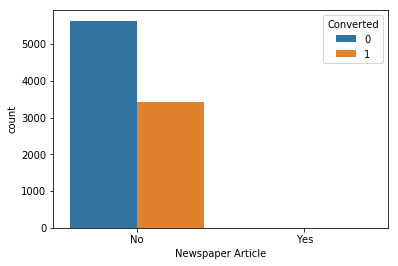

In [89]:
sns.countplot(x='Newspaper Article',hue='Converted',data=lead)

In [90]:
lead['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

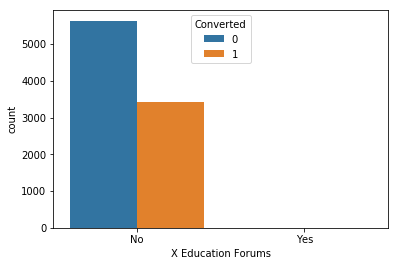

In [91]:
sns.countplot(x='X Education Forums',hue='Converted',data=lead)

In [92]:
lead['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

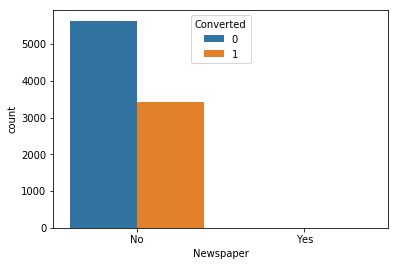

In [93]:
sns.countplot(x='Newspaper',hue='Converted',data=lead)

In [94]:
lead['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

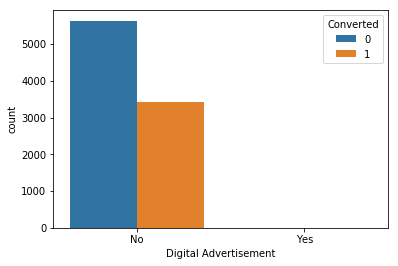

In [95]:
sns.countplot(x='Digital Advertisement',hue='Converted',data=lead)

In [96]:
lead['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

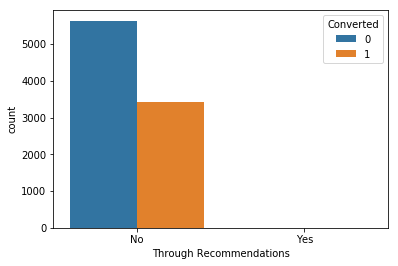

In [97]:
sns.countplot(x='Through Recommendations',hue='Converted',data=lead)

In [98]:
lead['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

In [99]:
lead['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

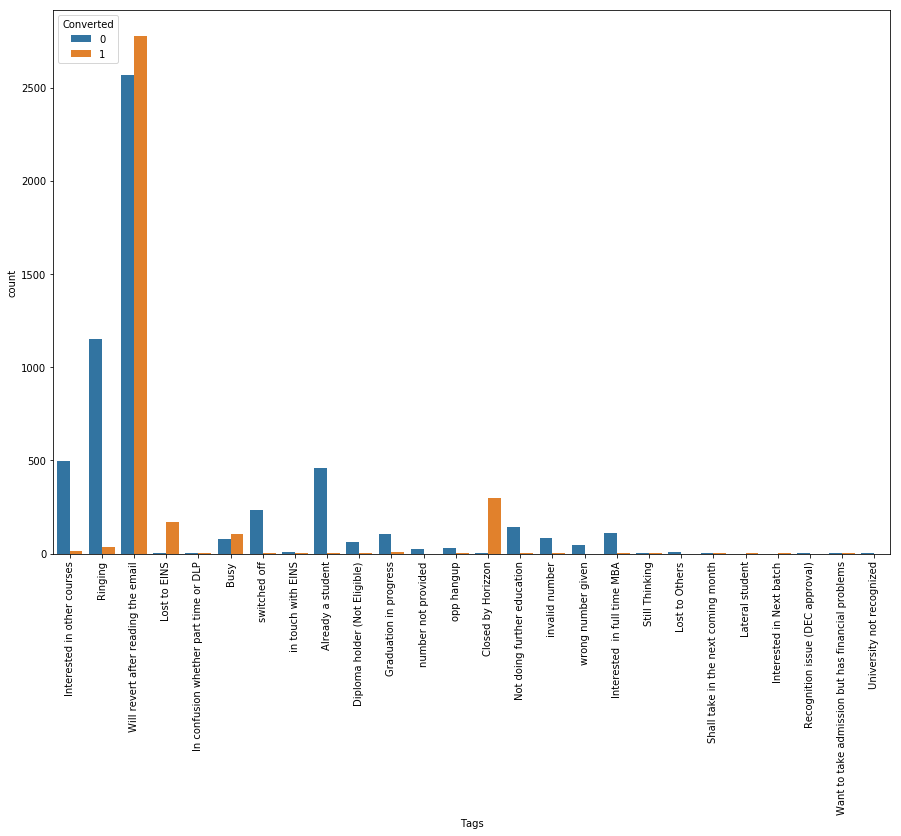

In [100]:
plt.figure(figsize=(15,10))
sns.countplot(x='Tags',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [101]:
lead['Tags']=lead['Tags'].replace(['In confusion whether part time or DLP','in touch with EINS','Diploma holder (Not Eligible)','Graduation in progress','number not provided','opp hangup','Still Thinking','Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch','Recognition issue (DEC approval)','Want to take admission but has financial problems','University not recognized'],'Other Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

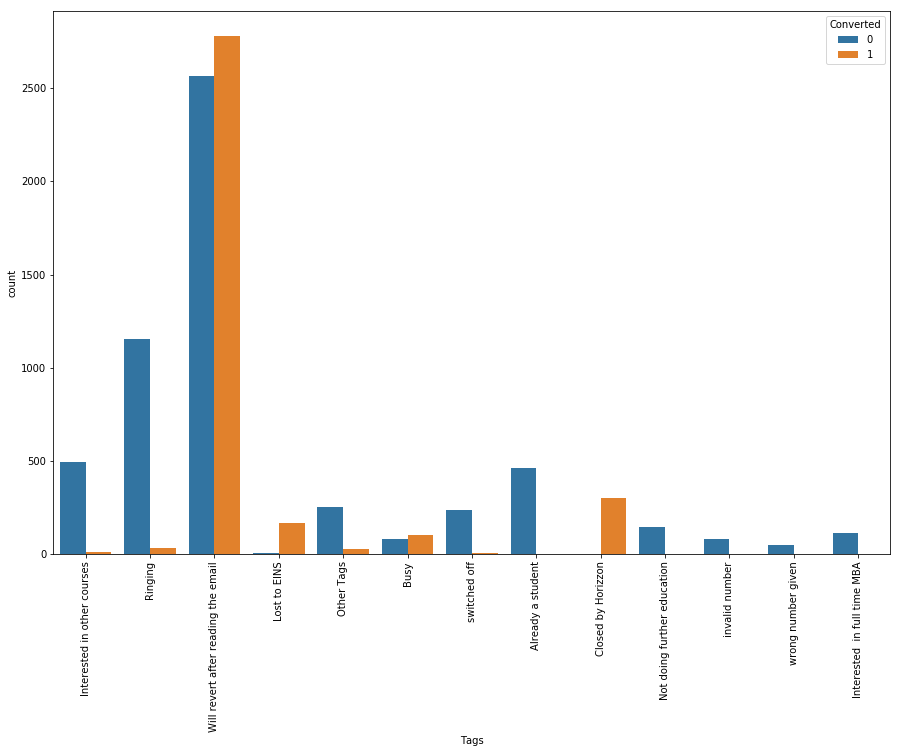

In [102]:
plt.figure(figsize=(15,10))
sns.countplot(x='Tags',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [103]:
lead['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

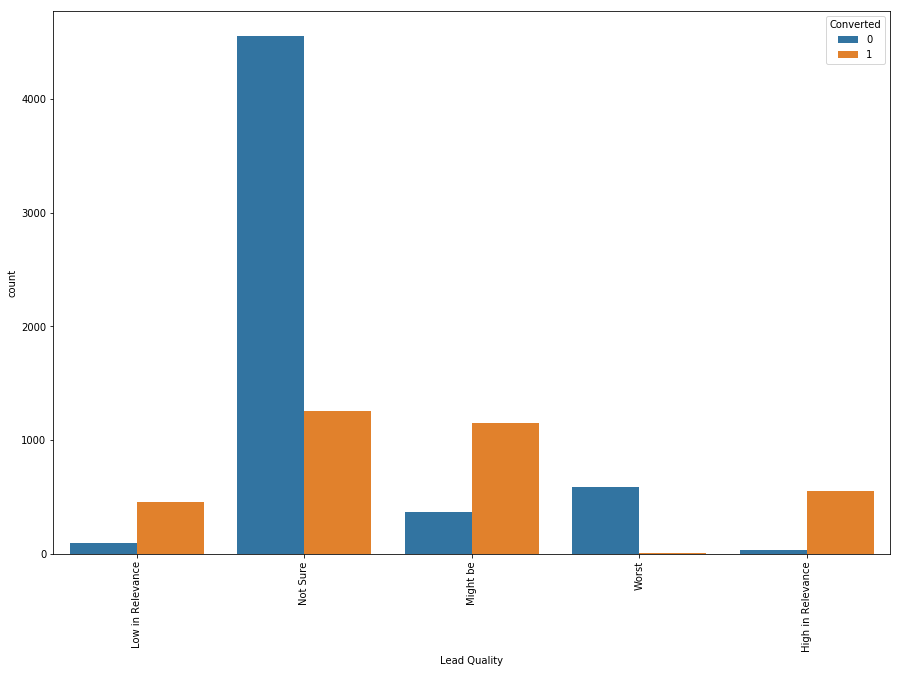

In [104]:
plt.figure(figsize=(15,10))
sns.countplot(x='Lead Quality',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [105]:
lead['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

In [106]:
lead['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [107]:
lead['City'].describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

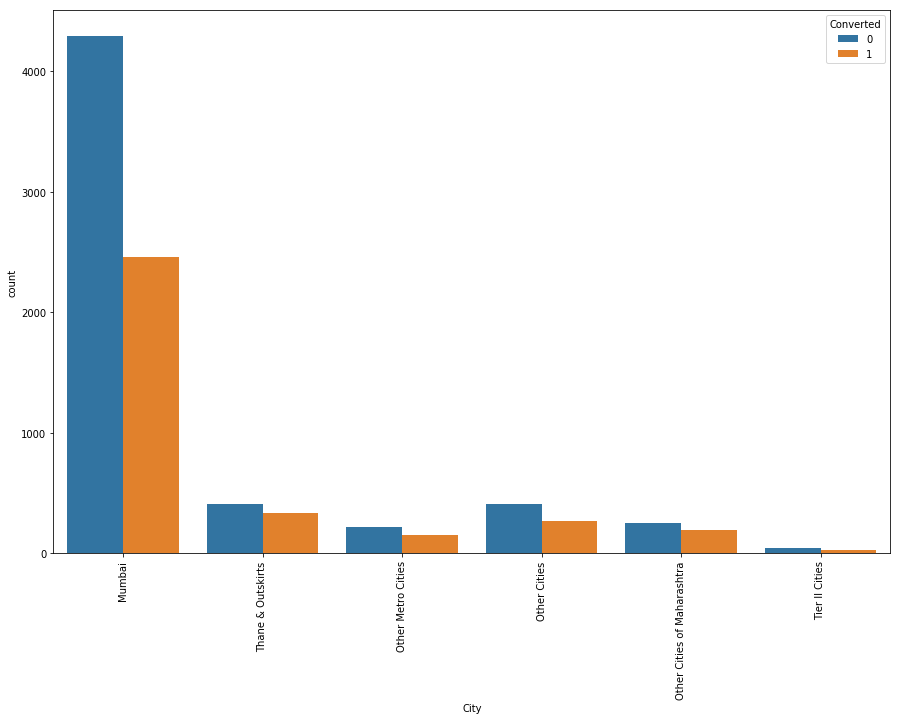

In [108]:
plt.figure(figsize=(15,10))
sns.countplot(x='City',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [109]:
lead['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [110]:
lead['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

(array([0, 1]), <a list of 2 Text xticklabel objects>)

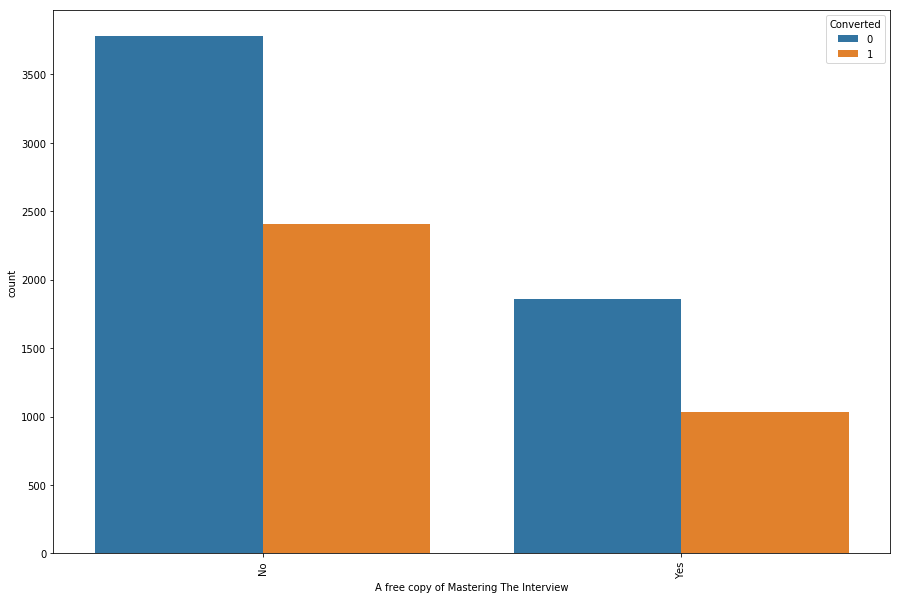

In [111]:
plt.figure(figsize=(15,10))
sns.countplot(x='A free copy of Mastering The Interview',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [112]:
lead['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

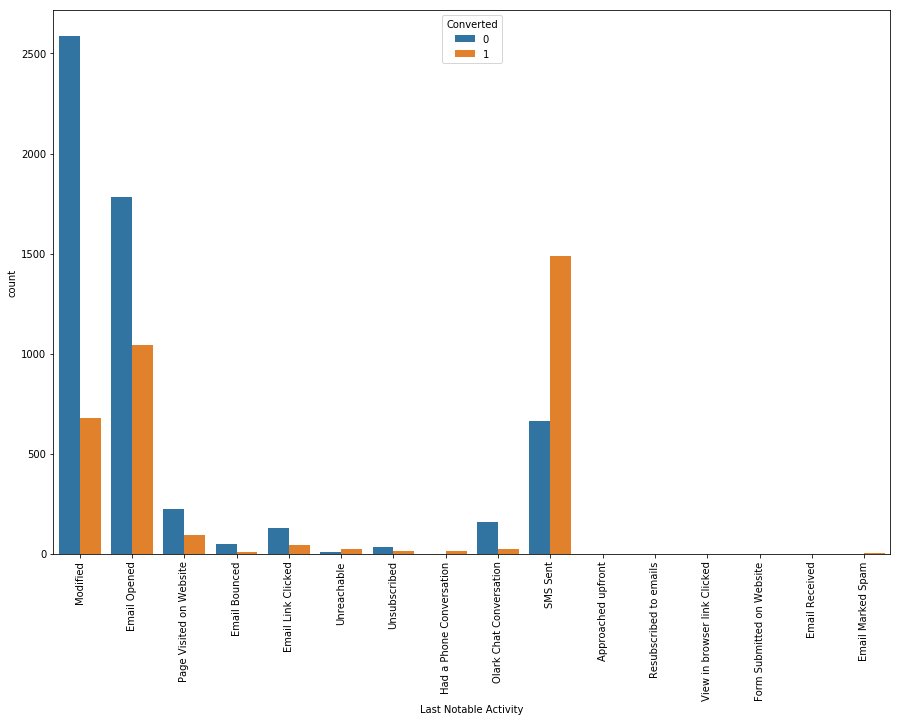

In [113]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Notable Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [114]:
lead['Last Notable Activity']=lead['Last Notable Activity'].replace(['Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received','Email Marked Spam'],'Other Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

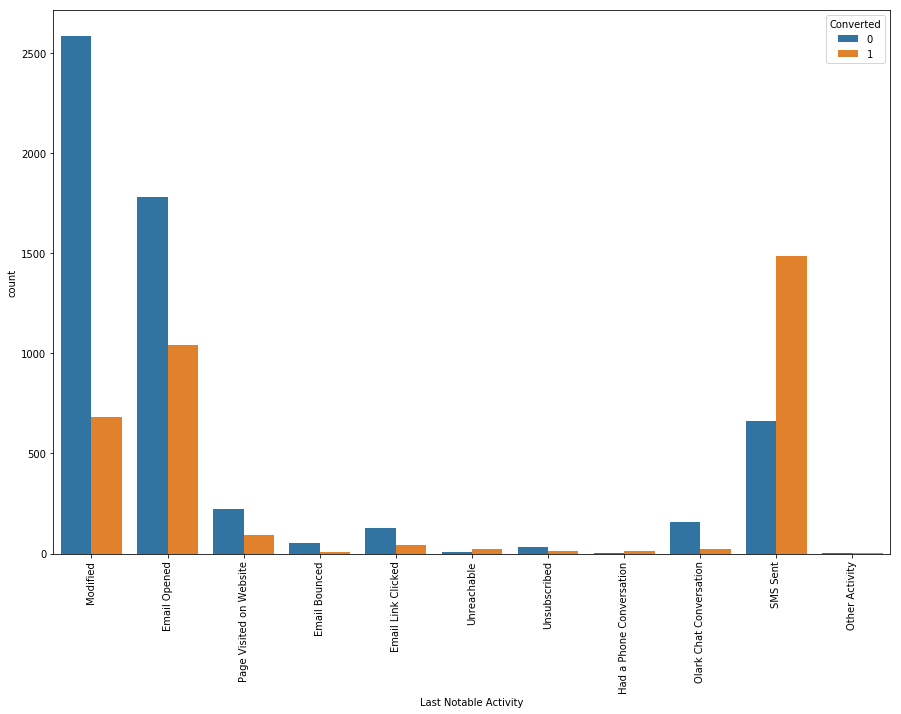

In [115]:
plt.figure(figsize=(15,10))
sns.countplot(x='Last Notable Activity',hue='Converted',data=lead)
plt.xticks(rotation=90)

In [116]:
lead=lead.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','Country','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],1)

In [117]:
lead.shape

(9074, 16)

In [118]:
lead.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [119]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
Prospect ID                        9074 non-null object
Lead Origin                        9074 non-null object
Lead Source                        9074 non-null object
Do Not Email                       9074 non-null object
Do Not Call                        9074 non-null object
Converted                          9074 non-null int64
TotalVisits                        9074 non-null float64
Total Time Spent on Website        9074 non-null int64
Page Views Per Visit               9074 non-null float64
Last Activity                      9074 non-null object
Specialization                     9074 non-null object
What is your current occupation    9074 non-null object
Tags                               9074 non-null object
Lead Quality                       9074 non-null object
City                               9074 non-null object
Last Notable Activity              9074 non-null obje

## step 4:Split the data into test and train data

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X=lead.drop(['Prospect ID','Converted'],axis=1)

In [122]:
X.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,API,Organic Search,No,No,5.0,674,2.5,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [123]:
y=lead['Converted']

In [124]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

In [126]:
X_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
3009,Landing Page Submission,Direct Traffic,No,No,2.0,397,2.0,Email Opened,Finance Management,Unemployed,Will revert after reading the email,Not Sure,Mumbai,Email Opened
1012,Landing Page Submission,Direct Traffic,Yes,No,2.0,190,2.0,Email Bounced,Other Specialization,Working Professional,Will revert after reading the email,Not Sure,Mumbai,Email Bounced
9226,API,Olark Chat,No,No,0.0,0,0.0,SMS Sent,Other Specialization,Unemployed,Ringing,Not Sure,Mumbai,Modified
4750,Landing Page Submission,Direct Traffic,No,No,2.0,1380,2.0,SMS Sent,Marketing Management,Unemployed,Will revert after reading the email,Not Sure,Other Cities,SMS Sent
7987,Landing Page Submission,Direct Traffic,No,No,5.0,1584,2.5,SMS Sent,Finance Management,Unemployed,Lost to EINS,Not Sure,Other Cities of Maharashtra,Modified


In [127]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
Prospect ID                        9074 non-null object
Lead Origin                        9074 non-null object
Lead Source                        9074 non-null object
Do Not Email                       9074 non-null object
Do Not Call                        9074 non-null object
Converted                          9074 non-null int64
TotalVisits                        9074 non-null float64
Total Time Spent on Website        9074 non-null int64
Page Views Per Visit               9074 non-null float64
Last Activity                      9074 non-null object
Specialization                     9074 non-null object
What is your current occupation    9074 non-null object
Tags                               9074 non-null object
Lead Quality                       9074 non-null object
City                               9074 non-null object
Last Notable Activity              9074 non-null obje

In [128]:
lead.shape

(9074, 16)

## Step 5:Data Preparation

In [129]:
from sklearn import preprocessing

# encode categorical variables using Label Encoder

# select all categorical variables
lead_categorical=lead.select_dtypes(include=['object'])
lead_categorical.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,Other Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,Other Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,Other Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [130]:
# appky label encoder to lead_categorical

le=preprocessing.LabelEncoder()
lead_categorical=lead_categorical.apply(le.fit_transform)
lead_categorical.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,4332,0,4,0,0,7,13,4,4,1,0,4
1,1527,0,5,0,0,3,13,4,8,3,0,2
2,5034,1,1,0,0,3,1,3,9,2,0,2
3,462,1,1,0,0,9,11,4,8,3,0,4
4,1842,1,3,0,0,0,13,4,9,2,0,4


In [131]:
# concat lead_categorical with original lead

lead = lead.drop(lead_categorical.columns, axis=1)
lead = pd.concat([lead, lead_categorical], axis=1)
lead.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,0,0.0,0,0.0,4332,0,4,0,0,7,13,4,4,1,0,4
1,0,5.0,674,2.5,1527,0,5,0,0,3,13,4,8,3,0,2
2,1,2.0,1532,2.0,5034,1,1,0,0,3,1,3,9,2,0,2
3,0,1.0,305,1.0,462,1,1,0,0,9,11,4,8,3,0,4
4,1,2.0,1428,1.0,1842,1,3,0,0,0,13,4,9,2,0,4


In [132]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 16 columns):
Converted                          9074 non-null int64
TotalVisits                        9074 non-null float64
Total Time Spent on Website        9074 non-null int64
Page Views Per Visit               9074 non-null float64
Prospect ID                        9074 non-null int32
Lead Origin                        9074 non-null int32
Lead Source                        9074 non-null int32
Do Not Email                       9074 non-null int32
Do Not Call                        9074 non-null int32
Last Activity                      9074 non-null int32
Specialization                     9074 non-null int32
What is your current occupation    9074 non-null int32
Tags                               9074 non-null int32
Lead Quality                       9074 non-null int32
City                               9074 non-null int32
Last Notable Activity              9074 non-null int32
dtypes: f

## Step 6:Model Building

In [133]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [134]:
# Putting feature variable to X
X = lead.drop('Converted',axis=1)

# Putting response variable to y
y = lead['Converted']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

#### Default hyperparameters

In [135]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [136]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [137]:
#making Predictions
predictions=rfc.predict(X_test)

In [138]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [139]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1700
           1       0.92      0.84      0.87      1023

   micro avg       0.91      0.91      0.91      2723
   macro avg       0.91      0.89      0.90      2723
weighted avg       0.91      0.91      0.91      2723



In [140]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[1622   78]
 [ 168  855]]


In [141]:
print(accuracy_score(y_test,predictions))

0.9096584649283878


## Hyperparameter tuning

### Tuning max_depth

In [142]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [143]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031893,0.001757,0.004797,0.001678,2,{'max_depth': 2},0.829268,0.833989,0.815748,0.845669,...,0.826956,0.012766,4,0.834449,0.829724,0.816965,0.836843,0.819559,0.827508,0.007932
1,0.058892,0.010107,0.005902,0.001552,7,{'max_depth': 7},0.894571,0.893784,0.885039,0.891339,...,0.888049,0.007112,3,0.909646,0.900197,0.897068,0.899823,0.902597,0.901866,0.004267
2,0.090100,0.007012,0.007680,0.001230,12,{'max_depth': 12},0.894571,0.904799,0.888189,0.907087,...,0.895922,0.008780,2,0.945669,0.950197,0.951388,0.948435,0.949626,0.949063,0.001945
3,0.087454,0.016143,0.011201,0.006533,17,{'max_depth': 17},0.889851,0.906373,0.898425,0.887402,...,0.896867,0.007225,1,0.980512,0.979331,0.983271,0.979335,0.977765,0.980043,0.001835


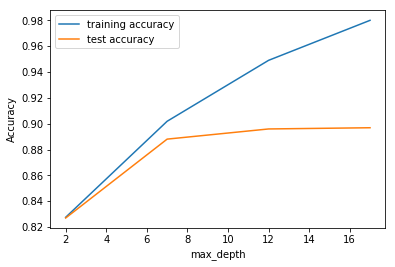

In [144]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


### Tuning n_estimaters

In [145]:
# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}

# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(100, 1500, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [146]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.417346,0.023571,0.030226,0.004178,100,{'n_estimators': 100},0.879622,0.878049,0.869291,0.888189,...,0.876397,0.007671,4,0.883465,0.881299,0.876009,0.875025,0.876427,0.878445,0.003318
1,1.808731,0.041174,0.125212,0.001876,500,{'n_estimators': 500},0.879622,0.874902,0.878740,0.889764,...,0.878444,0.006749,1,0.883268,0.877362,0.882110,0.878370,0.883707,0.880963,0.002602
2,3.856374,0.342606,0.231592,0.007592,900,{'n_estimators': 900},0.881983,0.876475,0.874803,0.888189,...,0.878129,0.006476,2,0.882480,0.878150,0.881716,0.878174,0.882330,0.880570,0.001983
3,4.844610,0.144027,0.327706,0.015493,1300,{'n_estimators': 1300},0.881196,0.878049,0.874016,0.888976,...,0.878129,0.006907,2,0.882480,0.879134,0.880339,0.879945,0.882920,0.880964,0.001477


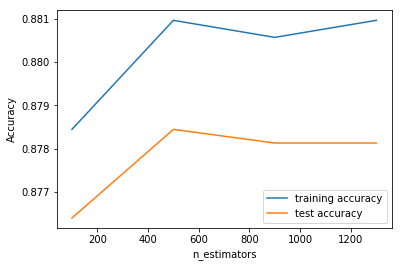

In [147]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### Tuning max_features

In [151]:
# GridSearchCV to find optimal max_features
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_features':[4,8,14]}

# instantiate the model
rf = RandomForestClassifier(max_depth=4)


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds, return_train_score=True,scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': [4, 8, 14]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=0)

In [152]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051680,0.006989,0.006054,0.001805,4,{'max_features': 4},0.851298,0.851298,0.892126,0.879528,...,0.867737,0.016033,3,0.862205,0.852756,0.894115,0.884472,0.880165,0.874743,0.015099
1,0.072605,0.002772,0.006033,0.001655,8,{'max_features': 8},0.894571,0.892998,0.888189,0.898425,...,0.889466,0.008799,2,0.894685,0.893307,0.886243,0.895296,0.888036,0.891513,0.003673
2,0.111101,0.012905,0.003987,0.000020,14,{'max_features': 14},0.900079,0.896932,0.894488,0.892126,...,0.893245,0.005944,1,0.892126,0.892913,0.896280,0.894312,0.897678,0.894662,0.002065


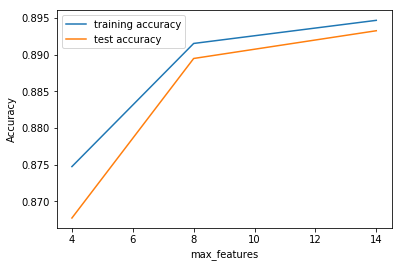

In [153]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


#### Tuning min_samples_leaf

In [154]:
# GridSearchCV to find optimal min_samples_leaf
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': range(100, 400, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [155]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051200,0.004340,0.006918,0.002498,100,{'min_samples_leaf': 100},0.859166,0.856019,0.862205,0.860630,...,0.858447,0.002939,1,0.861220,0.851772,0.859476,0.851604,0.867178,0.858250,0.005936
1,0.049244,0.001688,0.006380,0.001949,150,{'min_samples_leaf': 150},0.846577,0.853659,0.851181,0.867717,...,0.853881,0.007281,2,0.852362,0.850787,0.850817,0.858886,0.861669,0.854904,0.004511
2,0.049497,0.004359,0.005599,0.001933,200,{'min_samples_leaf': 200},0.830842,0.844217,0.841732,0.847244,...,0.841600,0.005660,4,0.842520,0.829528,0.841567,0.841173,0.849469,0.840851,0.006417
3,0.043699,0.003787,0.005140,0.001564,250,{'min_samples_leaf': 250},0.856806,0.842644,0.851181,0.853543,...,0.845379,0.012268,3,0.862992,0.841339,0.854556,0.855147,0.838253,0.850457,0.009252
4,0.040998,0.001537,0.006373,0.001941,300,{'min_samples_leaf': 300},0.829268,0.845004,0.829921,0.831496,...,0.828059,0.013079,5,0.821654,0.839567,0.830742,0.828380,0.817395,0.827547,0.007657


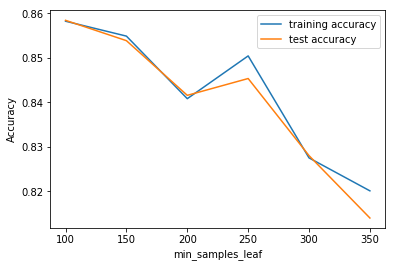

In [156]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Tuning min_samples_split

In [157]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': range(200, 500, 50)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [158]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.062321,0.006355,0.006806,0.001545,200,{'min_samples_split': 200},0.882769,0.886703,0.887402,0.892913,...,0.879547,0.016136,2,0.889961,0.881102,0.895099,0.892541,0.872688,0.886278,0.008271
1,0.057544,0.001941,0.005584,0.001944,250,{'min_samples_split': 250},0.889851,0.888277,0.886614,0.880315,...,0.882066,0.009006,1,0.888386,0.885630,0.886243,0.883881,0.885085,0.885845,0.001490
2,0.054179,0.001797,0.005853,0.001826,300,{'min_samples_split': 300},0.870968,0.867821,0.871654,0.882677,...,0.870257,0.007860,4,0.869882,0.869685,0.877977,0.873844,0.874852,0.873248,0.003141
3,0.050686,0.001784,0.006098,0.002198,350,{'min_samples_split': 350},0.881196,0.869394,0.869291,0.881102,...,0.871201,0.009664,3,0.869685,0.875197,0.875025,0.878961,0.862456,0.872265,0.005726
4,0.050479,0.001474,0.006373,0.001941,400,{'min_samples_split': 400},0.864673,0.878836,0.862992,0.865354,...,0.866163,0.006718,5,0.862008,0.873228,0.867743,0.865774,0.875049,0.868760,0.004797


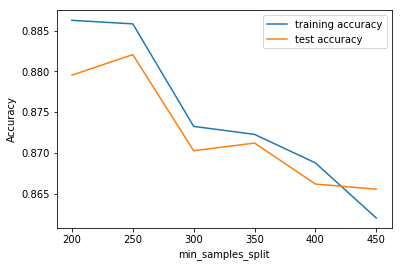

In [159]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Grid search to find optimal Hyperparameters

In [160]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [161]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [162]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8696268304204062 using {'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


##### Fitting the final model with the best Parameters Obtained from grid search

In [163]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [164]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [165]:
# predict
predictions = rfc.predict(X_test)

In [166]:
# evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix

In [167]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1700
           1       0.90      0.77      0.83      1023

   micro avg       0.88      0.88      0.88      2723
   macro avg       0.88      0.86      0.87      2723
weighted avg       0.88      0.88      0.88      2723



In [168]:
print(confusion_matrix(y_test,predictions))

[[1609   91]
 [ 240  783]]
